### 1. import the libraries to load the data and analysis

In [16]:
import pandas as pd
import numpy as np
import geopandas as gpd
import skmob, glob, os, sys, shapely, swifter
from shapely.geometry import Point, Polygon, LineString, MultiLineString, MultiPoint, MultiPolygon
from shapely import wkb, wkt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('D:\\ISB\\Sample_Village_full_data.csv')

,MAID,geohash,geometry,local_time,Date,hour
0,7115d644-0a10-4213-b6cc-56a91e620aaa,tsyw60hf7z20,POINT (76.7352 27.817808),2021-08-29T02:09:37.000+05:30,2021-08-29,2
1,7115d644-0a10-4213-b6cc-56a91e620aaa,tsyw60hf7vb0,POINT (76.7352 27.8178),2021-08-29T09:06:07.000+05:30,2021-08-29,9
2,7115d644-0a10-4213-b6cc-56a91e620aaa,tsyw60hf7z20,POINT (76.7352 27.817808),2021-08-29T09:06:57.000+05:30,2021-08-29,9
3,7115d644-0a10-4213-b6cc-56a91e620aaa,tsyw60hf7vb0,POINT (76.7352 27.8178),2021-08-29T02:16:32.000+05:30,2021-08-29,2
4,7115d644-0a10-4213-b6cc-56a91e620aaa,tsyw60hf7vb0,POINT (76.7352 27.8178),2021-08-29T18:50:30.000+05:30,2021-08-29,18


In [4]:
df['long'] = df['geometry'].apply(lambda geom: geom.x)
df['lat'] = df['geometry'].apply(lambda geom: geom.y)

In [40]:
x = df[['long','lat']].values

In [41]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 5000, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_1 = len(set(labels))
df['cluster_ID'] = labels
print(" Number of Cluster Excluding outlier: ", n_clusters_)
print(" Number of Cluster includingcluding outlier: ", n_clusters_1)
print(" Number of noise in our data: ", n_clusters_)

 Number of Cluster Excluding outlier:  31
 Number of Cluster includingcluding outlier:  32
 Number of noise in our data:  31


In [42]:
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

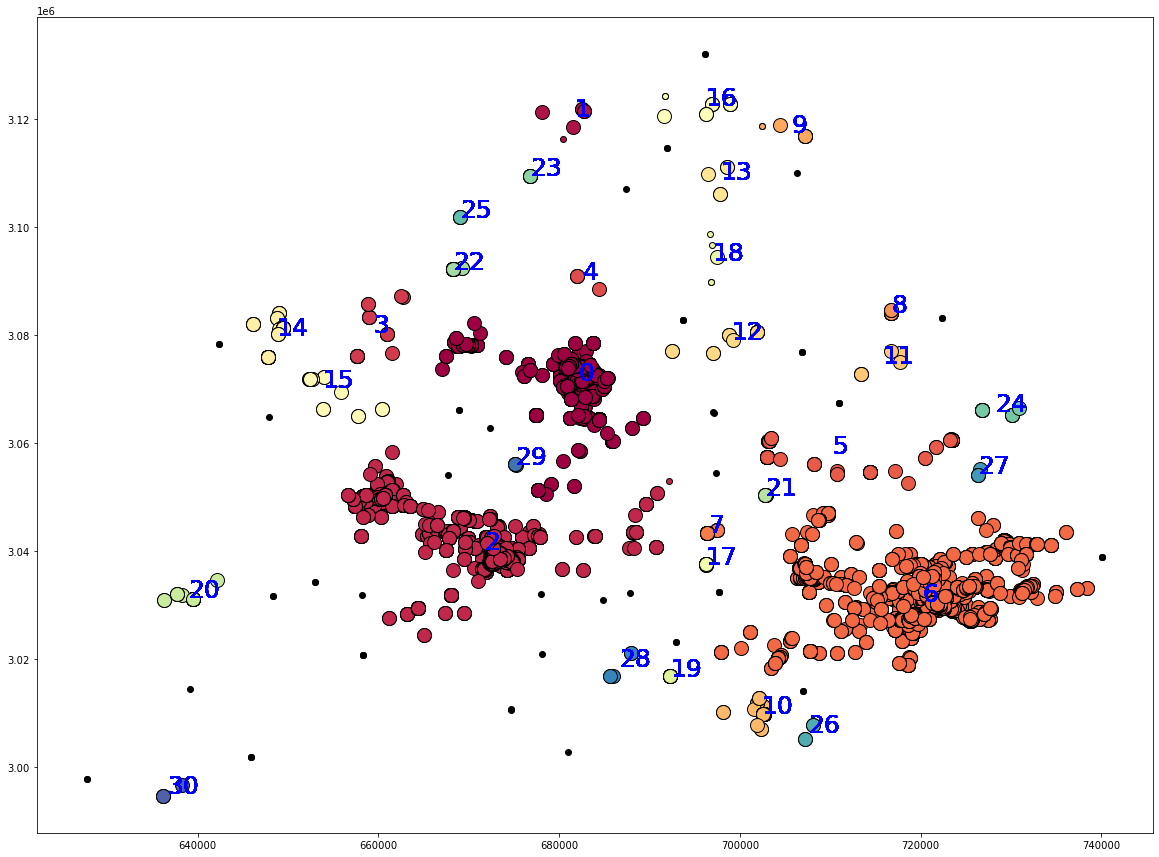

In [45]:
# Black removed and is used for noise instead.
plt.figure(figsize=(20,15))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    for clust_number in set(labels):
        c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
        clust_set = df[df.cluster_ID == clust_number]
        if clust_number != -1:
            cenx=np.mean(clust_set.long)
            ceny=np.mean(clust_set.lat)
            plt.text(cenx,ceny,str(clust_number), fontsize=25, color='blue')